# Дано

У агента есть стабильный доход раз в месяц, есть премия два раза в год. Он хочет взять квартиру в ипотеку. Есть стоимость квартиры, которая растет каждый месяц на фиксированный процент (годовой процент / 12), также пока он копит на ипотеку, ему нужно жить в съемной квартире и каждый месяц платить за нее фиксированную сумму.

Ипотека берется под какой-то процент и платится аннуитентными (фиксированными) платежами. Срок ипотеки определяется так, чтобы ежемесячный платеж не превышал какую-то сумму и был минимальным, чтобы не платить лишние проценты.

Также есть несколько ипотечных программ - айтишная ипотека 5% и обычная ипотека 11%

И есть два вида жилья - первичка и вторичка, вторичка дешевле, но для первички работает айтишная ипотека.

# Задача

Определить в каком месяце выгоднее всего взять ипотеку.

# Решение

Функции для вычисления аннуитентных платежей, формула:

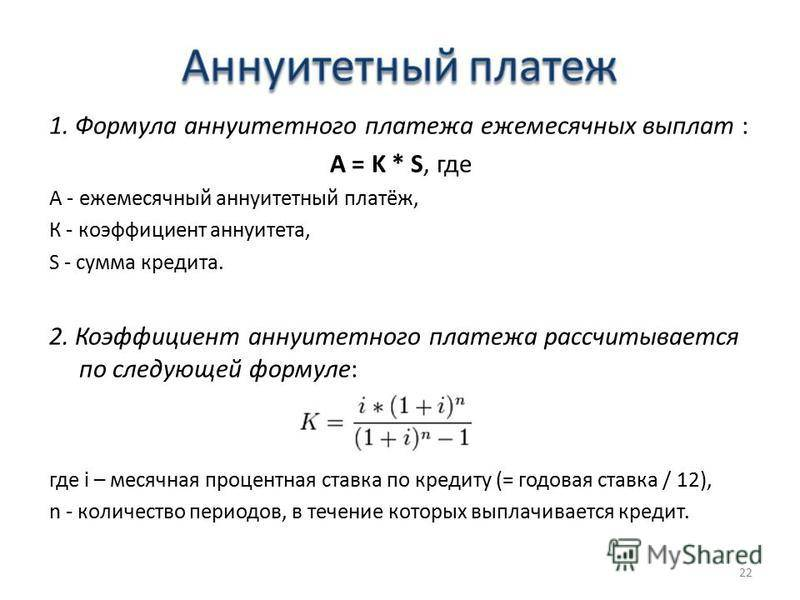

In [1]:
def get_pay_per_month(start_money, percent, years):
    monthly_percent = percent / 12
    coef = (1 + monthly_percent) ** (years * 12)
    annuitent = (monthly_percent * coef) / (coef - 1)
    return start_money * annuitent

def get_total_price(per_month, years):
    return per_month * years * 12

def get_optimal_years(mortgage, percent, max_per_month):
    for years in range(1, 30 + 1):
        per_month = get_pay_per_month(mortgage, percent, years)
        if per_month <= max_per_month:
            return years, per_month

## Импорты

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime, timedelta

## Параметры

In [5]:
# Доход и размер премии

income = 50000 # сколько ежемесячно откладывается
new_income = 70000 # если в какой-то момент происходит увеличение зп
award_small = 100000 # рассматривал кейс, если премия получилась равна окладу
award = award_small * 1.4 # кейс, если премия = 140% оклада
start_money = 1500000 # сколько денег есть на начало периода
max_pay_by_month = 80000 # сколько максимум можно платить за месяц

# стоимости квартир
new_flat_price = 10000000
old_flat_price = 9000000

# размер аренды и стоимость ремонта
rent = 40000
new_repair_price = 1500000
old_repair_price = 1000000

# разные ипотечные программы
it_percent = 0.05
usual_percent = 0.11

# увеличение стоимости квартиры
flat_price_increase_per_year = 0.05

# month_now = '2023-05-31'
# month_to_buy = '2023-08-31'
august = '2023-08-31'
january = '2024-01-31'

In [6]:
def get_award_by_month(x, award_size):
    # считаем, что премия платится в 5 и 11 месяцах
    if x.name.month in [5, 11]:
        return award_size
    return 0

## Табличка с доходом

Считаем сколько денег в каждом месяце будет у агента

In [29]:
periods = 48
df = pd.DataFrame(pd.date_range('2023-06-01', periods=periods, freq='m'), columns=['date'])
df['income'] = income
df.set_index('date', inplace=True)
df.loc['2023-08-01':, 'income'] = new_income
df['award'] = df.apply(lambda x: get_award_by_month(x, award), axis=1)
df['small_award'] = df.apply(lambda x: get_award_by_month(x, award_small), axis=1)
df['total_income'] = df['income'] + df['award']
df['total_income_small'] = df['income'] + df['small_award']
df['total_money'] = np.cumsum(df['total_income']) + start_money
df['total_small_money'] = np.cumsum(df['total_income_small']) + start_money
df

,income,award,small_award,total_income,total_income_small,total_money,total_small_money
date,,,,,,,
2023-06-30,50000,0.0,0,50000.0,50000,1550000.0,1550000
2023-07-31,50000,0.0,0,50000.0,50000,1600000.0,1600000
2023-08-31,70000,0.0,0,70000.0,70000,1670000.0,1670000
2023-09-30,70000,0.0,0,70000.0,70000,1740000.0,1740000
2023-10-31,70000,0.0,0,70000.0,70000,1810000.0,1810000
2023-11-30,70000,140000.0,100000,210000.0,170000,2020000.0,1980000
2023-12-31,70000,0.0,0,70000.0,70000,2090000.0,2050000
2024-01-31,70000,0.0,0,70000.0,70000,2160000.0,2120000
2024-02-29,70000,0.0,0,70000.0,70000,2230000.0,2190000


## Считаем переплаты по процентам

In [30]:
def get_overpayment(flat_price, month, percent, max_pay):
    mortgage_size = flat_price - df.loc[month].total_money

    years, per_month = get_optimal_years(mortgage_size, percent, max_pay)
    overpayment = get_total_price(per_month, years) - mortgage_size
    return overpayment

## Считаем затраты на аренду

In [31]:
def get_month_delta(a, b):
    delta = datetime.fromisoformat(a) - datetime.fromisoformat(b)
    return delta.days // 30

In [32]:
def get_loss_by_rent(month_to_buy, rent_price, repair, month_now):
    months = get_month_delta(month_to_buy, month_now)
    return (months + repair) * rent_price

## Рост стоимости квартир

In [33]:
def get_real_flat_price(flat_price, month_to_buy, month_now, flat_price_increase_per_year):
    flat_price_increase = flat_price_increase_per_year / 12
    month_delta = get_month_delta(month_to_buy, month_now)
    return flat_price * (1 + (month_delta * flat_price_increase))

## Общие затраты

In [34]:
def get_total_loss(flat_price, month_to_buy, percent, max_pay, rent_price, repair_price, flat_price_increase, repair=6, month_now='2023-05-31'):
    real_flat_price = get_real_flat_price(flat_price, month_to_buy, month_now, flat_price_increase)
    overpayment = get_overpayment(real_flat_price, month_to_buy, percent, max_pay)
    by_rent = get_loss_by_rent(month_to_buy, rent_price, repair, month_now)
    return overpayment + by_rent + repair_price

## Примеры

In [35]:
loss_new_august = get_total_loss(new_flat_price, august, it_percent, max_pay_by_month, rent, new_repair_price, flat_price_increase_per_year)
loss_old_january_usual = get_total_loss(old_flat_price, january, usual_percent, max_pay_by_month, rent, old_repair_price, flat_price_increase_per_year)

loss_new_august, loss_old_january_usual

(4665725.763295693, 9623064.67487842)

## Шорткаты для старой и новой квартиры

In [36]:
def get_loss_old_flat(month, percent):
    return get_total_loss(old_flat_price, month, percent, max_pay_by_month, rent, old_repair_price, flat_price_increase_per_year)

def get_loss_new_flat(month, percent):
    return get_total_loss(new_flat_price, month, percent, max_pay_by_month, rent, new_repair_price, flat_price_increase_per_year)

## Ищем оптимальный месяц

In [37]:
def get_losses(loss_func, percent):
    months = []
    losses = []
    for month in df.index:
        months.append(month.date())
        losses.append(loss_func(month.date().isoformat(), percent))
    losses = pd.Series(losses, index=months)
    return losses

def get_best_month_and_loss(loss_func, percent):
    losses = get_losses(loss_func, percent)
    best_loss = losses.iloc[losses.argmin()]
    best_month = losses.index[losses.argmin()].isoformat()
    return best_month, best_loss

In [38]:
get_best_month_and_loss(get_loss_new_flat, it_percent)

('2023-06-30', 4597893.310465513)

<AxesSubplot:title={'center':'Затраты на покупку в разных месяцах'}>

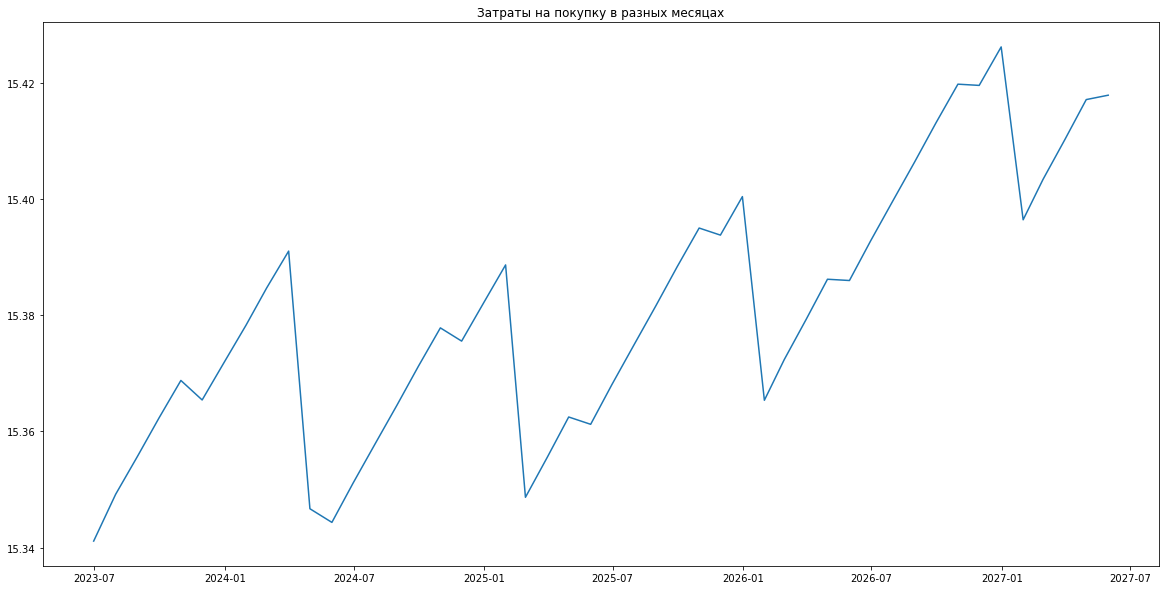

In [39]:
plt.figure(figsize=(20, 10))
np.log(get_losses(get_loss_new_flat, it_percent)).plot(title='Затраты на покупку в разных месяцах')